# Preface: to be changed in links

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for selected two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Cities Data for Sao Paulo and New York between May 2020- May 2021- Daily Total Confirmed Cases, Population, Cases per Million population
https://github.com/archinarula/Group-5-Project/blob/main/Clean_CSV/cities_dataframe.csv

2. Weather Data for Sao Paulo and New York - Daily Average Temp and Avergae Humidity
https://github.com/archinarula/Group-5-Project/blob/main/Clean_CSV/NYC_SaoPaulo_Weather.csv



# Dependencies and Data Load

In [73]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

Import the data

In [74]:
# Add the Resources path variables:
NY_Covid = "Resources/NYCovid_newdata.csv"
SP_Covid = "Resources/SPCovid_newdata.csv"
Weather= "Resources/NY_SP_Weather_df.csv"
Combined_data="Resources/Final_combine_data.csv"

#Read CSVs and Create Dataframes:
NYCovid_df = pd.read_csv(NY_Covid, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)
SPCovid_df = pd.read_csv(SP_Covid, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)
CitiesWeather_df = pd.read_csv(Weather, parse_dates=['date'], encoding="ISO-8859-1",low_memory=False)
Combined_df= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


# City Level- New Data Basic Exploration- Statistical Summary and Outlier Detections

New York Dataset- Statistical Summary

In [75]:
print (NYCovid_df.shape)
NYCovid_df.head()

(449, 4)


,date,CASE_COUNT,CASE_COUNT_7DAY_AVG,Cal_per_100K_moving7_avg_new_cases
0,2020-02-29,1,0,0.0
1,2020-03-01,0,0,0.0
2,2020-03-02,0,0,0.0
3,2020-03-03,1,0,0.0
4,2020-03-04,5,0,0.0


In [76]:
NYCovid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                449 non-null    datetime64[ns]
 1   CASE_COUNT                          449 non-null    int64         
 2   CASE_COUNT_7DAY_AVG                 449 non-null    int64         
 3   Cal_per_100K_moving7_avg_new_cases  449 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 14.2 KB


In [77]:
#statistical summary of NY covid data
NYCovid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CASE_COUNT,449.0,1739.781737,1618.124958,0.0,372.00,1053.00,3006.00,6578.00
CASE_COUNT_7DAY_AVG,449.0,1737.734967,1518.874709,0.0,351.00,1093.00,2919.00,5291.00
Cal_per_100K_moving7_avg_new_cases,449.0,9.241292,8.077252,0.0,1.87,5.81,15.52,28.14


Sao Paulo Dataset- Statistical Summary

In [78]:
print (SPCovid_df.shape)
SPCovid_df.head()

(448, 4)


,date,new cases,Cal_avg_new_cases_7_days,avg_cases_per_100_k
0,2020-02-25,0,0.0,0.0
1,2020-02-26,0,0.0,0.0
2,2020-02-27,0,0.0,0.0
3,2020-02-28,1,0.0,0.0
4,2020-02-29,0,0.0,0.0


In [79]:
SPCovid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      448 non-null    datetime64[ns]
 1   new cases                 448 non-null    int64         
 2   Cal_avg_new_cases_7_days  448 non-null    float64       
 3   avg_cases_per_100_k       448 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 14.1 KB


In [80]:
#statistical summary of SP covid data
SPCovid_df.describe().T

,count,mean,std,min,25%,50%,75%,max
new cases,448.0,1680.037946,1424.529381,0.0,532.2500,1366.00,2517.00,8646.00
Cal_avg_new_cases_7_days,448.0,1668.488839,974.334144,0.0,941.7500,1672.50,2275.25,4706.00
avg_cases_per_100_k,448.0,14.056518,8.208705,0.0,7.9375,14.09,19.17,39.65


Weather dataset-Statistical Summary

In [81]:
print (CitiesWeather_df.shape)
CitiesWeather_df.head()


(974, 16)


,date,city_name,lat,lon,temp_mean,humidity_mean,temp_min,temp_max,1_7_day_avg_temp,8_14_day_avg_temp,1_7_day_avg_humidity,8_14_day_avg_humidity,percent_change_in_temp,percent_change_in_humidity,1_15_day_avg_temp,1_15_day_avg_humidity
0,2020-01-16,New York,40.712775,-74.005973,6.97,71.04,2.78,10.00,7.23,4.82,68.06,68.26,-50.00,0.29,5.89,67.66
1,2020-01-17,New York,40.712775,-74.005973,-1.48,40.42,-6.67,4.55,8.49,4.09,71.70,66.39,-107.58,-8.00,6.09,68.35
2,2020-01-18,New York,40.712775,-74.005973,-4.42,56.04,-7.22,1.11,7.71,3.60,67.86,64.84,-114.17,-4.66,5.77,67.14
3,2020-01-19,New York,40.712775,-74.005973,3.39,76.44,-1.67,7.22,5.22,4.22,65.52,61.64,-23.70,-6.29,4.98,65.66
4,2020-01-20,New York,40.712775,-74.005973,-2.58,45.25,-7.22,2.78,3.29,5.93,66.96,62.60,44.52,-6.96,4.63,64.44


In [82]:
CitiesWeather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        974 non-null    datetime64[ns]
 1   city_name                   974 non-null    object        
 2   lat                         974 non-null    float64       
 3   lon                         974 non-null    float64       
 4   temp_mean                   974 non-null    float64       
 5   humidity_mean               974 non-null    float64       
 6   temp_min                    974 non-null    float64       
 7   temp_max                    974 non-null    float64       
 8   1_7_day_avg_temp            974 non-null    float64       
 9   8_14_day_avg_temp           974 non-null    float64       
 10  1_7_day_avg_humidity        974 non-null    float64       
 11  8_14_day_avg_humidity       974 non-null    float64       

In [83]:
#statistical summary of Weather data of 2 cities-Sao Paolo and New York
CitiesWeather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,974.0,8.581127,32.148155,-23.550520,-23.550520,8.581128,40.712775,40.712775
lon,974.0,-60.319641,13.693363,-74.005973,-74.005973,-60.319641,-46.633309,-46.633309
temp_mean,974.0,16.377680,7.924567,-6.020000,11.230000,18.695000,22.420000,30.420000
humidity_mean,974.0,67.697782,13.004947,27.420000,59.790000,70.000000,76.780000,94.640000
temp_min,974.0,11.117372,7.612051,-11.110000,6.110000,13.000000,16.982500,25.560000
temp_max,974.0,22.772331,8.903614,-2.780000,17.780000,25.560000,29.055000,37.220000
1_7_day_avg_temp,974.0,16.368316,7.632859,-2.790000,10.592500,18.940000,22.457500,28.370000
8_14_day_avg_temp,974.0,16.353532,7.714233,-2.790000,10.440000,19.015000,22.547500,28.370000
1_7_day_avg_humidity,974.0,67.824815,8.111741,39.120000,63.642500,69.430000,73.210000,85.830000
8_14_day_avg_humidity,974.0,67.884415,8.096467,39.120000,63.650000,69.405000,73.300000,85.830000


New York -Covid Cases outlier detection

In [71]:
# Set x axis and tick locations for Covid cases in city plotting
x_axis = np.arange(len(NYCovid_df))
tick_locations = [value for value in x_axis]

In [72]:
NYCovid_df.head()

,date,CASE_COUNT,CASE_COUNT_7DAY_AVG,Cal_per_100K_moving7_avg_new_cases
0,2020-02-29,1,0,0.0
1,2020-03-01,0,0,0.0
2,2020-03-02,0,0,0.0
3,2020-03-03,1,0,0.0
4,2020-03-04,5,0,0.0


<AxesSubplot:xlabel='CASE_COUNT'>

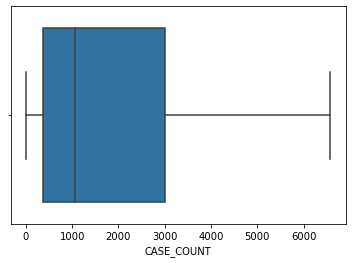

In [15]:
#Finding Outliers in NY Covid data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='CASE_COUNT', data = NYCovid_df)

<AxesSubplot:xlabel='CASE_COUNT_7DAY_AVG'>

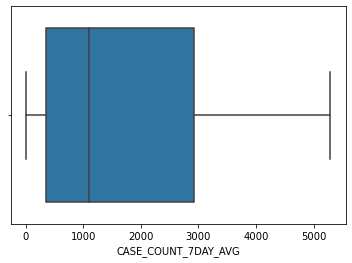

In [16]:
sns.boxplot(x ='CASE_COUNT_7DAY_AVG', data = NYCovid_df)

Sao Paulo Covid Cases data plotting and outlier detection

In [17]:
SPCovid_df.head()


,date,new cases,Cal_avg_new_cases_7_days,avg_cases_per_100_k
0,2020-02-25,0,0.0,0.0
1,2020-02-26,0,0.0,0.0
2,2020-02-27,0,0.0,0.0
3,2020-02-28,1,0.0,0.0
4,2020-02-29,0,0.0,0.0


In [20]:
SPCovid_df[SPCovid_df['new cases']>6000]

,date,new cases,Cal_avg_new_cases_7_days,avg_cases_per_100_k
115,2020-06-19,6877,2826.0,23.81
169,2020-08-12,6896,2577.0,21.71
170,2020-08-13,7063,3092.0,26.05
400,2021-03-31,8348,4073.0,34.31
401,2021-04-01,8646,4706.0,39.65
406,2021-04-06,6740,4468.0,37.64


<AxesSubplot:xlabel='new cases'>

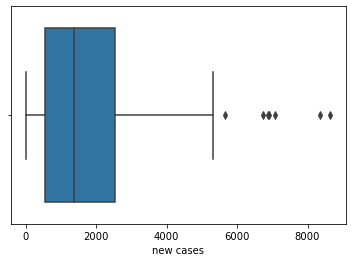

In [19]:
#Finding Outliers in Sao Paulo Covid data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='new cases', data = SPCovid_df)

<AxesSubplot:xlabel='Cal_avg_new_cases_7_days'>

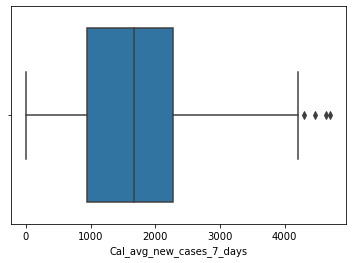

In [21]:
sns.boxplot(x ='Cal_avg_new_cases_7_days', data = SPCovid_df)
#sns.boxplot(x ='avg_cases_per_100_k', data = SPCovid_df)

In [22]:
SPCovid_df[SPCovid_df['Cal_avg_new_cases_7_days']>4300]
#SPCovid_df[SPCovid_df['avg_cases_per_100_k']>35]

,date,new cases,Cal_avg_new_cases_7_days,avg_cases_per_100_k
401,2021-04-01,8646,4706.0,39.65
402,2021-04-02,3743,4635.0,39.05
406,2021-04-06,6740,4468.0,37.64


<AxesSubplot:xlabel='1_7_day_avg_temp'>

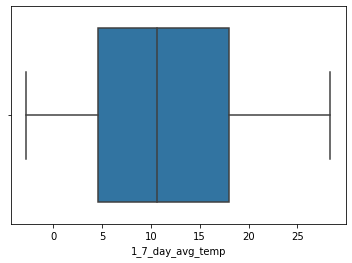

In [28]:
#Finding Outliers in NY Tempreture data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='1_7_day_avg_temp', data = NYWeatherTemp_df)

<AxesSubplot:xlabel='humidity_mean'>

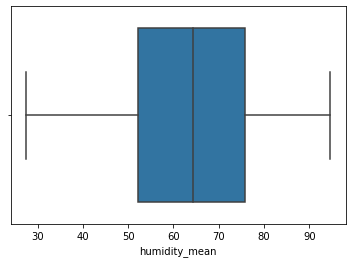

In [31]:
#Finding Outliers in NY Humidity data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='humidity_mean', data = NYWeatherHumidity_df)

<AxesSubplot:xlabel='1_7_day_avg_humidity'>

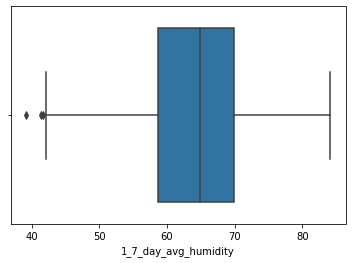

In [32]:
sns.boxplot(x ='1_7_day_avg_humidity', data = NYWeatherHumidity_df)

<AxesSubplot:xlabel='temp_mean'>

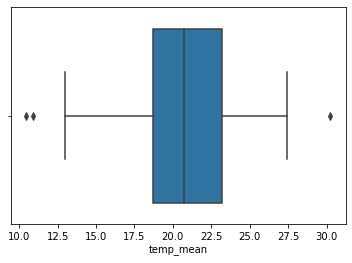

In [35]:
#Finding Outliers in Sao Paulo Temp data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='temp_mean', data = SPWeatherTemp_df)

In [36]:
#SPWeatherTemp_df[SPWeatherTemp_df['temp_mean']>29]
SPWeatherTemp_df[SPWeatherTemp_df['temp_mean']<12.5]

,date,temp_mean,1_7_day_avg_temp,8_14_day_avg_temp,1_15_day_avg_temp
218,2020-08-21,10.92,18.70,18.95,18.67
219,2020-08-22,10.44,17.08,19.70,18.30


<AxesSubplot:xlabel='humidity_mean'>

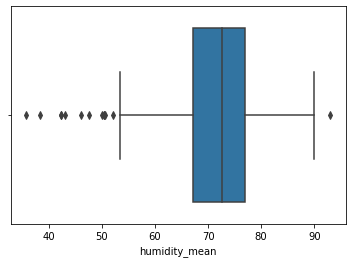

In [39]:
#Finding Outliers in Sao Paulo Humidity data

# This is kind of univatiate analysis if we are finding outliers in the data
#x needs to be a numerical variable

sns.boxplot(x ='humidity_mean', data = SPWeatherHumidity_df)

In [40]:
SPWeatherHumidity_df[SPWeatherHumidity_df['humidity_mean']<50]


,date,humidity_mean,1_7_day_avg_humidity,8_14_day_avg_humidity,1_15_day_avg_humidity
11,2020-01-27,47.50,77.20,79.78,78.90
174,2020-07-08,43.08,66.87,72.67,68.60
240,2020-09-12,42.33,65.00,63.65,64.56
241,2020-09-13,46.12,61.83,64.55,62.86
242,2020-09-14,38.29,60.12,65.11,62.05
255,2020-09-27,42.38,73.50,59.58,64.92
260,2020-10-02,35.71,59.47,73.58,66.59
